In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("drug200.csv")
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [4]:
df.shape

(200, 6)

In [5]:
df["BP"].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [6]:
df["Cholesterol"].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [7]:
df["Drug"].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [8]:
#checking for null values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: >

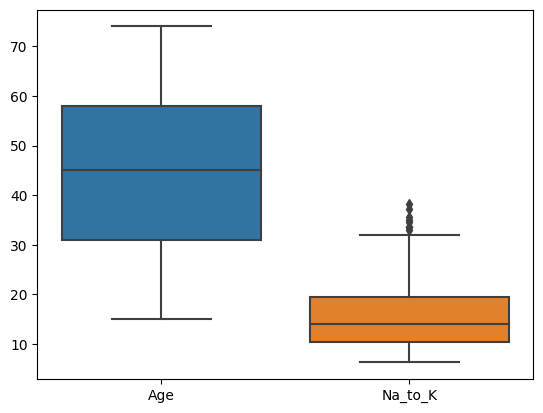

In [9]:
sns.boxplot(df)

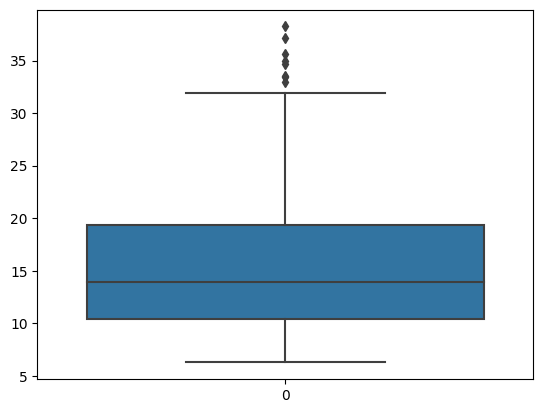

In [10]:
sns.boxplot(df.Na_to_K)
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)


In [11]:
IQR = q3 - q1
IQR

8.9345

In [12]:
x=df.iloc[:,0:5]

x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [13]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [14]:
df.median()

<ipython-input-14-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

<Axes: >

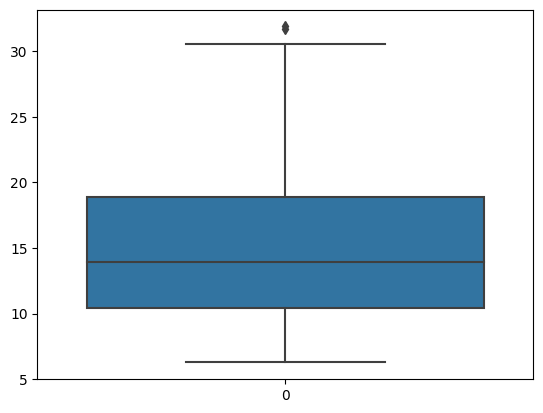

In [15]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,13.9365,df['Na_to_K'])
sns.boxplot(df.Na_to_K)

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df["Drug"]=encoder.fit_transform(df["Drug"])
#Manual encoding
'''df["Sex"]=df["Sex"].replace({"F":0,"M":1})
df.head(10)'''
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Sex","BP","Cholesterol"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)], remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x
y=df['Drug']

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(transformed_x,y,test_size=0.2,random_state=7)
xtrain,ytrain

(array([[ 1.   ,  0.   ,  0.   , ...,  0.   , 32.   ,  7.477],
        [ 0.   ,  1.   ,  0.   , ...,  1.   , 47.   , 33.542],
        [ 1.   ,  0.   ,  0.   , ...,  1.   , 38.   , 29.875],
        ...,
        [ 1.   ,  0.   ,  1.   , ...,  1.   , 28.   , 18.809],
        [ 0.   ,  1.   ,  0.   , ...,  0.   , 16.   , 12.006],
        [ 1.   ,  0.   ,  1.   , ...,  0.   , 73.   , 18.348]]),
 129    4
 128    0
 60     0
 122    0
 27     4
       ..
 151    2
 67     4
 25     0
 196    3
 175    0
 Name: Drug, Length: 160, dtype: int64)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(8,input_dim=9,activation="relu"))

model.add(Dense(10,activation="relu"))

model.add(Dense(12,activation="relu"))


model.add(Dense(32,activation="relu"))

model.add(Dense(64,activation="softmax"))


In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [20]:
model.fit(xtrain,ytrain,batch_size=32,epochs=500,validation_data=(xtest,ytest))

Epoch 1/500
5/5 [==============================] - 2s 75ms/step - loss: 23.5536 - accuracy: 0.0000e+00 - val_loss: 21.0627 - val_accuracy: 0.0000e+00
Epoch 2/500
5/5 [==============================] - 0s 14ms/step - loss: 18.3072 - accuracy: 0.0000e+00 - val_loss: 16.0647 - val_accuracy: 0.0000e+00
Epoch 3/500
5/5 [==============================] - 0s 12ms/step - loss: 13.8897 - accuracy: 0.0000e+00 - val_loss: 11.9755 - val_accuracy: 0.0000e+00
Epoch 4/500
5/5 [==============================] - 0s 11ms/step - loss: 10.2087 - accuracy: 0.0000e+00 - val_loss: 8.4988 - val_accuracy: 0.0000e+00
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 7.0829 - accuracy: 0.0000e+00 - val_loss: 5.4546 - val_accuracy: 0.0000e+00
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 4.4871 - accuracy: 0.0000e+00 - val_loss: 3.5015 - val_accuracy: 0.1000
Epoch 7/500
5/5 [==============================] - 0s 17ms/step - loss: 2.9245 - accuracy: 0.0875 - val_loss:

In [36]:
xtest.shape

(40, 9)

In [21]:
y_preds=model.predict(xtest)

2/2 [==============================] - 0s 5ms/step


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
 dense_2 (Dense)             (None, 12)                132       
                                                                 
 dense_3 (Dense)             (None, 32)                416       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
Total params: 2,830
Trainable params: 2,830
Non-trainable params: 0
_________________________________________________________________


In [23]:
y_preds

array([[6.54390082e-02, 6.78395118e-09, 5.40870024e-05, ...,
        2.30802926e-14, 1.02459111e-12, 4.02702492e-16],
       [9.99999821e-01, 7.99660425e-12, 1.82247456e-14, ...,
        1.16452794e-17, 8.68558834e-18, 4.76990822e-17],
       [9.99999940e-01, 1.24219713e-13, 7.76659078e-15, ...,
        2.03971058e-20, 6.55851485e-22, 1.86335131e-20],
       ...,
       [8.34735692e-01, 1.65225431e-01, 1.02223576e-05, ...,
        2.56954097e-10, 7.23831065e-12, 1.40134441e-11],
       [6.57817647e-02, 4.38672841e-01, 4.95426923e-01, ...,
        9.11927339e-11, 2.32110609e-13, 3.11522103e-13],
       [7.52800815e-06, 1.34149592e-12, 7.12113106e-08, ...,
        2.06897759e-20, 1.03605976e-17, 4.37352438e-23]], dtype=float32)

In [24]:
score=model.evaluate(xtest,ytest,verbose=0)

In [25]:
print("accuracy :" ,score[1]*100)

accuracy : 94.9999988079071


In [39]:
#testing with sample data
data=[[50,'F','HIGH','NORMAL',30.555],
      [42,'M','HIGH','HIGH',34.823],
      [26,'F','LOW','NORMAL',26.53],
      [32,'M','NORMAL','HIGH',20.76]      
      ]
test=pd.DataFrame(data,columns=["Age","Sex","BP","Cholesterol","Na_to_K"])
test
categorical_features=["Sex","BP","Cholesterol"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)], remainder="passthrough")
transformed_data=transformer.fit_transform(test)
transformed_data.shape

(4, 9)

In [40]:
model.predict(transformed_data)

1/1 [==============================] - 0s 86ms/step


array([[1.00000000e+00, 4.07526356e-12, 2.25299845e-18, 2.45098639e-14,
        2.65852377e-24, 9.98504721e-33, 8.00840929e-26, 1.98035844e-21,
        1.23224712e-30, 1.17260468e-26, 9.09600563e-24, 1.88268183e-24,
        4.76451224e-23, 1.45399083e-25, 2.35449392e-25, 3.50930460e-28,
        9.12077527e-25, 6.16977089e-27, 1.27734677e-23, 2.44666042e-26,
        2.38023794e-27, 4.89668621e-29, 1.43557046e-27, 8.79958267e-25,
        7.41672183e-25, 4.09584234e-24, 5.03978418e-22, 9.82223019e-24,
        3.16624458e-22, 7.28398710e-25, 7.56546007e-24, 2.05124803e-23,
        5.62967234e-28, 5.76175919e-24, 2.90685222e-21, 2.48869037e-26,
        3.19177161e-22, 5.94461748e-22, 1.71286137e-24, 5.82294285e-24,
        1.18943718e-24, 2.28617848e-22, 2.14660134e-22, 6.53284993e-21,
        1.87714999e-27, 3.24804963e-30, 7.53259859e-25, 5.58052601e-32,
        4.53743394e-26, 8.29484481e-24, 7.69883310e-23, 5.71887487e-27,
        1.26594710e-23, 1.00432193e-26, 4.95932816e-27, 2.713626